In [1]:
import sys
sys.path.append('../')

import tquant as tq
from datastore import *
import matplotlib.pyplot as plt

In [2]:
def modifica_stringhe(lista_stringhe):
    # Lista per memorizzare le stringhe modificate
    stringhe_modificate = []
    
    # Rimozione del prefisso FRA
    prefisso = "fra-"
    for stringa in lista_stringhe:
        if stringa.startswith(prefisso):
            stringa = stringa[len(prefisso):]
        stringhe_modificate.append(stringa)

    # Dizionario delle sostituzioni
    sostituzioni = {
        "1BD": "O/N",
        "2BD": "T/N",
        "3BD": "S/N",
        "CASH": "depo",
        "SWAP": "ois",
        "FRA": "fra",
    }

    # Lista temporanea per memorizzare le stringhe modificate ulteriormente
    stringhe_modificate_finali = []

    # Iterare su ciascuna stringa nella lista delle stringhe modificate
    for stringa in stringhe_modificate:
        for chiave, valore in sostituzioni.items():
            stringa = stringa.replace(chiave, valore)
        stringhe_modificate_finali.append(stringa)
    
    return stringhe_modificate_finali

In [3]:
#bootstrap della estr
tq.Settings.evaluation_date = date(2024, 4, 30)

trade_date = tq.Settings.evaluation_date
market_data = {}

curve_stripper_eur = tq.CurveBootstrap(evaluation_date=trade_date,
                                   daycount_convention=tq.DayCounterConvention.Actual365,
                                   curve_map=curve_map)


# ESTR

total iteration:  4


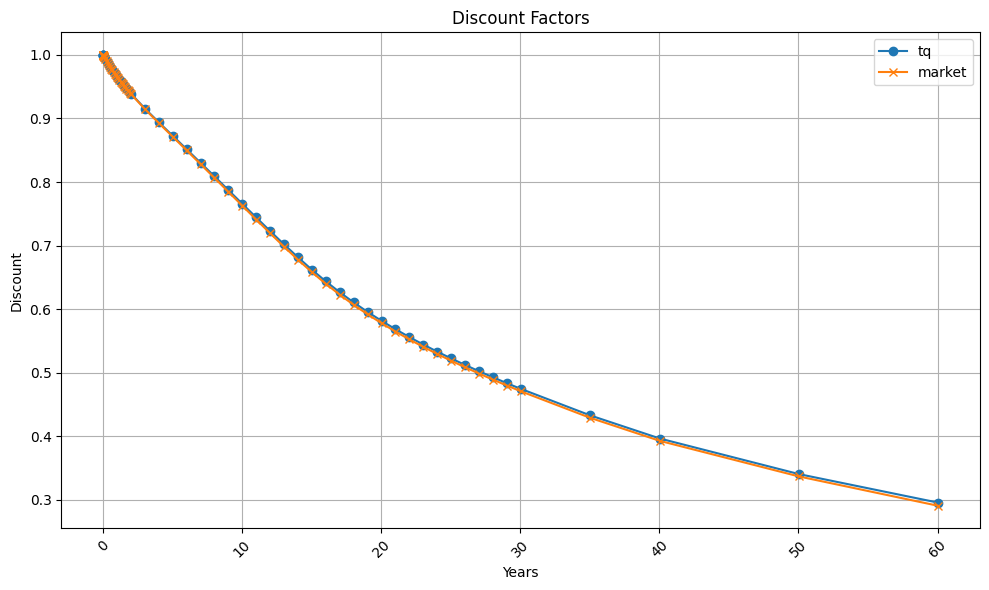

In [4]:
eur_disc_name = "EUR:ESTR"
generators = ir_eur_curve_estr['type'].tolist()#modifica_stringhe(ir_eur_curve_estr['type'])
maturities = list(modifica_stringhe(ir_eur_curve_estr['tenor']))
quotes = ir_eur_curve_estr['quote'].values

estr_curve = curve_stripper_eur.strip(generators, maturities, quotes, eur_disc_name,
                                               currency=tq.Currency.EUR, market_data=market_data)
discount_estr = []
fwd_estr = []
discounts_estr_mkt = ir_eur_disc_estr
for maturity in discounts_estr_mkt['daycount'].values/365:
    discount_estr.append(market_data[eur_disc_name].discount(maturity))
    fwd_estr.append(market_data[eur_disc_name].inst_fwd(maturity))
    
# Plot discount factors nostri vs market
plt.figure(figsize=(10, 6))
plt.plot(discounts_estr_mkt['daycount'].values/365, discount_estr, label= 'tq', marker='o', linestyle='-')
plt.plot(discounts_estr_mkt['daycount'].values/365, discounts_estr_mkt['market_quote'].values, label= 'market', marker='x', linestyle='-')
plt.xlabel('Years')
plt.ylabel('Discount')
plt.title('Discount Factors')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# Mostrare il grafico
plt.show()

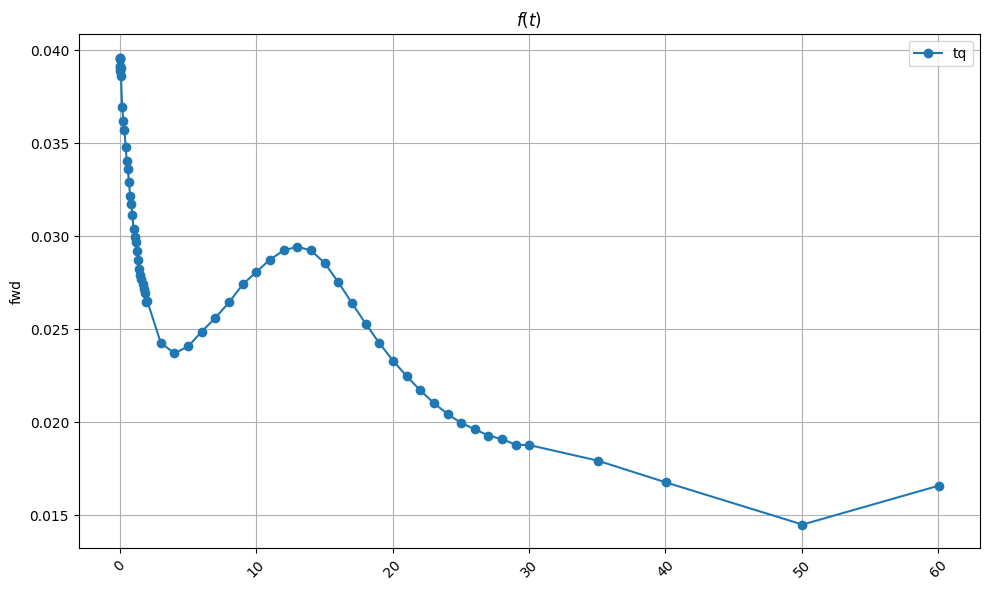

In [5]:
plt.figure(figsize=(10, 6))
plt.title('$f (t)$')
plt.plot(discounts_estr_mkt['daycount'].values/365, fwd_estr, label= 'tq', marker='o', linestyle='-')
plt.ylabel('fwd')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Eur6m

In [6]:
eur_6m_name = "EUR:6M"
generators_6m = ir_eur_curve_6m['type'].tolist()#modifica_stringhe(ir_eur_curve_6m['type'])
maturities_6m = list(modifica_stringhe(ir_eur_curve_6m['tenor']))
quotes_6m = ir_eur_curve_6m['quote'].values

In [7]:
eur6m_curve = curve_stripper_eur.strip(generators_6m, maturities_6m, quotes_6m, eur_6m_name,
                                               currency=tq.Currency.EUR, market_data=market_data)

LinAlgError: Singular matrix